In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('ifood_df.csv')

In [3]:
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Income                2205 non-null   float64
 1   Kidhome               2205 non-null   int64  
 2   Teenhome              2205 non-null   int64  
 3   Recency               2205 non-null   int64  
 4   MntWines              2205 non-null   int64  
 5   MntFruits             2205 non-null   int64  
 6   MntMeatProducts       2205 non-null   int64  
 7   MntFishProducts       2205 non-null   int64  
 8   MntSweetProducts      2205 non-null   int64  
 9   MntGoldProds          2205 non-null   int64  
 10  NumDealsPurchases     2205 non-null   int64  
 11  NumWebPurchases       2205 non-null   int64  
 12  NumCatalogPurchases   2205 non-null   int64  
 13  NumStorePurchases     2205 non-null   int64  
 14  NumWebVisitsMonth     2205 non-null   int64  
 15  AcceptedCmp3         

In [4]:
print(df.isnull().sum())

Income                  0
Kidhome                 0
Teenhome                0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
Age                     0
Customer_Days           0
marital_Divorced        0
marital_Married         0
marital_Single          0
marital_Together        0
marital_Widow           0
education_2n Cycle      0
education_Basic         0
education_Graduation    0
education_Master        0
education_PhD           0
MntTotal                0
MntRegularProds         0
AcceptedCmpO

In [5]:
df.dropna(inplace=True)

In [6]:
df['TotalSpend'] = (
    df['MntWines'] +
    df['MntFruits'] +
    df['MntMeatProducts'] +
    df['MntFishProducts'] +
    df['MntSweetProducts'] +
    df['MntGoldProds']
)

# Optional: Avg spend per purchase
df['TotalPurchases'] = (
    df['NumDealsPurchases'] +
    df['NumWebPurchases'] +
    df['NumCatalogPurchases'] +
    df['NumStorePurchases']
)

df['AvgPurchaseValue'] = df['TotalSpend'] / df['TotalPurchases']


In [7]:
# Purchase frequency by channel
print(df[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].describe())

# Total purchases
print(df['TotalPurchases'].describe())


       NumWebPurchases  NumCatalogPurchases  NumStorePurchases
count      2205.000000          2205.000000        2205.000000
mean          4.100680             2.645351           5.823583
std           2.737424             2.798647           3.241796
min           0.000000             0.000000           0.000000
25%           2.000000             0.000000           3.000000
50%           4.000000             2.000000           5.000000
75%           6.000000             4.000000           8.000000
max          27.000000            28.000000          13.000000
count    2205.000000
mean       14.887982
std         7.615277
min         0.000000
25%         8.000000
50%        15.000000
75%        21.000000
max        43.000000
Name: TotalPurchases, dtype: float64


In [8]:
# Summary of customer behavior
df[['Income', 'Recency', 'TotalSpend', 'TotalPurchases', 'AvgPurchaseValue']].describe()


C:\Users\DELL\AppData\Roaming\Python\Python313\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,Income,Recency,TotalSpend,TotalPurchases,AvgPurchaseValue
count,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000
mean,51622.094785,49.009070,606.821769,14.887982,inf
std,20713.063826,28.932111,601.675284,7.615277,NaN
min,1730.000000,0.000000,5.000000,0.000000,0.533333
25%,35196.000000,24.000000,69.000000,8.000000,9.714286
50%,51287.000000,49.000000,397.000000,15.000000,23.388889
75%,68281.000000,74.000000,1047.000000,21.000000,45.533333
max,113734.000000,99.000000,2525.000000,43.000000,inf


In [24]:
from sklearn.preprocessing import StandardScaler
features = df[[
    'Income',
    'Recency',
    'MntWines',
    'MntFruits',
    'MntMeatProducts',
    'MntFishProducts',
    'MntSweetProducts',
    'MntGoldProds',
    'NumDealsPurchases',
    'NumWebPurchases',
    'NumCatalogPurchases',
    'NumStorePurchases'
]].copy()

features['Cluster'] = df['Cluster']


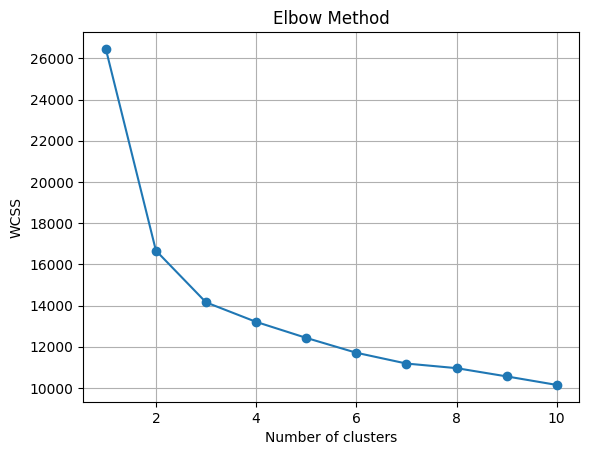

In [25]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Elbow Method to find optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

# Plot WCSS vs Number of clusters
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid()
plt.show()


In [26]:
# Let's assume optimal k = 4
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_features)


In [27]:
# Summary statistics per cluster
cluster_summary = df.groupby('Cluster').mean()
print(cluster_summary)


               Income   Kidhome  Teenhome    Recency    MntWines   MntFruits  \
Cluster                                                                        
0        74690.125313  0.055138  0.295739  50.471178  703.167920   38.957393   
1        34092.226396  0.761421  0.455838  49.000000   37.215228    4.673096   
2        54826.077652  0.348485  0.865530  48.214015  399.808712   16.369318   
3        73366.372014  0.064846  0.317406  48.481229  500.931741  100.440273   

         MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  \
Cluster                                                                     
0             417.528822        69.894737         41.924812     63.466165   
1              20.560406         6.820305          4.974619     14.414213   
2             110.104167        22.162879         16.113636     56.518939   
3             407.959044       126.092150        101.303754     94.822526   

         ...  education_Master  education_PhD     MntTot

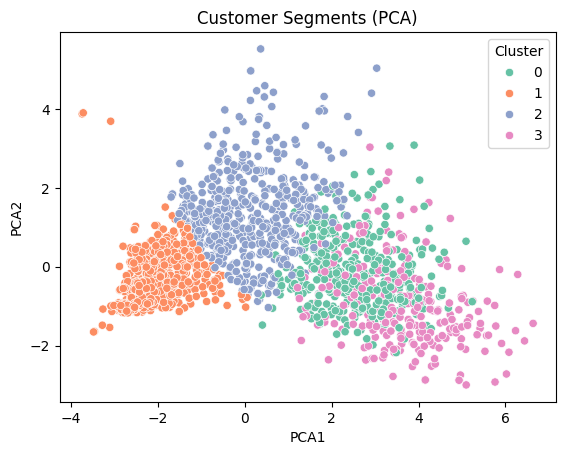

In [28]:
from sklearn.decomposition import PCA
import seaborn as sns

# Reduce to 2D
pca = PCA(n_components=2)
components = pca.fit_transform(scaled_features)
df['PCA1'] = components[:, 0]
df['PCA2'] = components[:, 1]

# Plot
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Cluster', palette='Set2')
plt.title('Customer Segments (PCA)')
plt.show()


In [29]:
# Combine original features with cluster labels
features['Cluster'] = df['Cluster']

# Analyze average behavior per cluster
cluster_summary = features.groupby('Cluster').mean()
cluster_summary


,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases
Cluster,,,,,,,,,,,,
0,74690.125313,50.471178,703.167920,38.957393,417.528822,69.894737,41.924812,63.466165,1.506266,5.335840,6.135338,8.601504
1,34092.226396,49.000000,37.215228,4.673096,20.560406,6.820305,4.974619,14.414213,1.930964,1.976650,0.521827,3.173604
2,54826.077652,48.214015,399.808712,16.369318,110.104167,22.162879,16.113636,56.518939,4.013258,6.250000,2.503788,7.155303
3,73366.372014,48.481229,500.931741,100.440273,407.959044,126.092150,101.303754,94.822526,1.672355,5.686007,5.286689,8.549488
